# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | You may never see your ref...
1,Not Verified | Cargo service: that's how I fel...
2,✅ Trip Verified | Inefficient and slow airport...
3,Not Verified | The customer service is one of...
4,"Not Verified | Before my flight, I was forced ..."


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
# Load the dataset
df = pd.read_csv('data/BA_reviews.csv')

# Display the first few rows before cleaning
print("Before cleaning:\n", df.head())

Before cleaning:
    Unnamed: 0                                            reviews
0           0  ✅ Trip Verified |   You may never see your ref...
1           1  Not Verified | Cargo service: that's how I fel...
2           2  ✅ Trip Verified | Inefficient and slow airport...
3           3  Not Verified |  The customer service is one of...
4           4  Not Verified | Before my flight, I was forced ...


In [6]:
# Define the text to be removed
unwanted_text = "✅ Trip Verified"

In [7]:
print(df.columns)

Index(['Unnamed: 0', 'reviews'], dtype='object')


In [8]:
df['reviews'] = df['reviews'].str.replace(unwanted_text, '', regex=False).str.strip()

In [9]:
# Display the first few rows after cleaning
print("After cleaning:\n", df.head())

After cleaning:
    Unnamed: 0                                            reviews
0           0  |   You may never see your refund. I cancelled...
1           1  Not Verified | Cargo service: that's how I fel...
2           2  | Inefficient and slow airport operation. Rest...
3           3  Not Verified |  The customer service is one of...
4           4  Not Verified | Before my flight, I was forced ...


In [10]:
# Define the text to be removed
unwanted_text_2 = "Not Verified"
df['reviews'] = df['reviews'].str.replace(unwanted_text_2, '', regex=False).str.strip()
# Display the first few rows after cleaning
print("After cleaning:\n", df.head())

After cleaning:
    Unnamed: 0                                            reviews
0           0  |   You may never see your refund. I cancelled...
1           1  | Cargo service: that's how I felt in the A380...
2           2  | Inefficient and slow airport operation. Rest...
3           3  |  The customer service is one of the worst I ...
4           4  | Before my flight, I was forced by the ground...


In [11]:
# Save the cleaned data to a new CSV file
df.to_csv('data/british_airways_reviews_cleaned.csv', index=False)

In [12]:
df = pd.read_csv('data/british_airways_reviews_cleaned.csv')

In [13]:
print(df.columns)

Index(['Unnamed: 0', 'reviews'], dtype='object')


In [14]:
df = df.drop('Unnamed: 0', axis=1)

In [15]:
print("After cleaning:\n", df.head())

After cleaning:
                                              reviews
0  |   You may never see your refund. I cancelled...
1  | Cargo service: that's how I felt in the A380...
2  | Inefficient and slow airport operation. Rest...
3  |  The customer service is one of the worst I ...
4  | Before my flight, I was forced by the ground...


In [16]:
df.to_csv('data/british_airways_reviews_cleaned_2.csv', index=False)

In [17]:
df.to_csv('data/british_airways_reviews_cleaned_2.csv', index=False)

In [18]:
# Find rows where all columns are NaN
empty_rows = df[df.isnull().all(axis=1)]

print(empty_rows)

Empty DataFrame
Columns: [reviews]
Index: []


In [19]:
!pip install matplotlib

In [20]:
import matplotlib.pyplot as plt
import numpy as np


In [24]:
df = pd.read_csv('data/british_airways_reviews_cleaned_2.csv')
search_word = 'delayed'

# Filter rows where 'Review' column contains the word 'delayed'
# Case insensitive search
delayed_reviews = df[df['reviews'].str.contains(search_word, case=False, na=False)]

# Display the filtered reviews
print(delayed_reviews.head())

                                              reviews
3   |  The customer service is one of the worst I ...
9   |  We had to change from AA to BA for a flight...
23  |   On March 1st, I flew from Berlin to São Pa...
32  |  Flight delayed an hour due to bad weather a...
34  | The worst airline I’ve ever flown. Could not...


In [25]:
# Count the number of filtered reviews
count_delayed_reviews = filtered_reviews.shape[0]

print(f"Number of reviews containing the word '{search_word}': {count_filtered_reviews}")

Number of reviews containing the word 'delayed': 134


In [26]:
!pip install wordcloud matplotlib

     |████████████████████████████████| 27.6 MB 2.2 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.3-cp39-cp39-linux_aarch64.whl size=450543 sha256=49ced63bed7584be62a9272ee0d5e0c2c86eb2927528cced7e0912a9e2f073e5
  Stored in directory: /home/opam/.cache/pip/wheels/35/02/b3/ea51390e997897c6ecd2d81fdee4160efd10dfc48e6282ab0b
Successfully built wordcloud


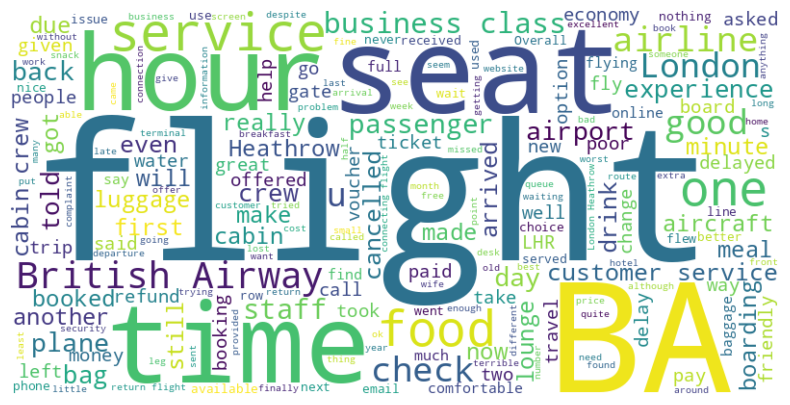

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single text
all_reviews = ' '.join(df['reviews'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
!pip install gensim nltk

     |████████████████████████████████| 26.5 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 31.4 MB/s eta 0:00:01
     |████████████████████████████████| 33.7 MB 58.8 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 20.8 MB/s eta 0:00:011
     |████████████████████████████████| 80 kB 29.7 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 27.5 MB/s eta 0:00:01
     |████████████████████████████████| 777 kB 66.3 MB/s eta 0:00:01


In [34]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/opam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
!pip install spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 1.3 MB 3.3 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached thinc-8.2.5-cp39-cp39-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (882 kB)
  Using cached preshed-3.0.9-cp39-cp39-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (150 kB)
     |████████████████████████████████| 182 kB 41.9 MB/s eta 0:00:01
  Using cached pydantic-2.8.2-py3-none-any.whl (423 kB)
     |████████████████████████████████| 47 kB 23.8 MB/s  eta 0:00:01
  Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
     |████████████████████████████████| 50 kB 2.4 MB/s  eta 0:00:01
  Using cached srsly-2.4.8-cp39-cp39-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (489 kB)
  Using cached murmurhash-1.0.10-cp39-cp39-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (29 kB)
  Using cached cymem-2.0.8-cp39-cp39-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (44 kB)
  Usin

In [39]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Load the dataset
df = pd.read_csv('data/british_airways_reviews_cleaned_2.csv')

# Combine all reviews into a single text
all_reviews = ' '.join(df['reviews'].dropna())

# Tokenize using spaCy
doc = nlp(all_reviews.lower())
tokens = [token.text for token in doc if token.is_alpha and token.text not in stopwords.words('english')]

# Count word frequencies
word_freq = Counter(tokens)

# Prepare data for plotting
words, counts = zip(*word_freq.most_common(20))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

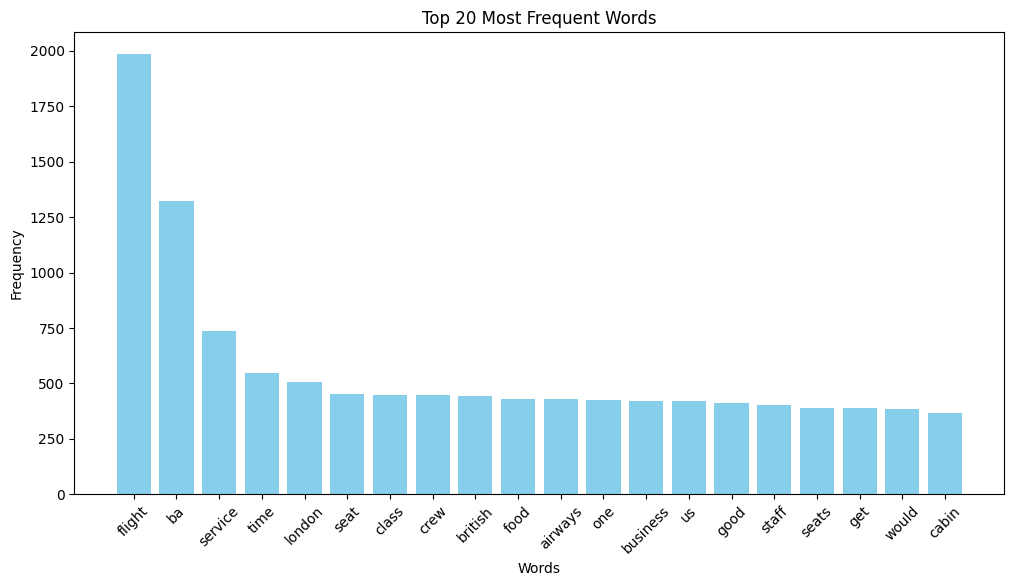

In [40]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_csv('data/british_airways_reviews_cleaned_2.csv')

# Combine all reviews into a single text
all_reviews = ' '.join(df['reviews'].dropna())

# Tokenize manually using regex
tokens = re.findall(r'\b\w+\b', all_reviews.lower())
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Prepare data for plotting
words, counts = zip(*word_freq.most_common(20))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


In [46]:
# Download necessary resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /home/opam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/opam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/opam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/opam/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/opam/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

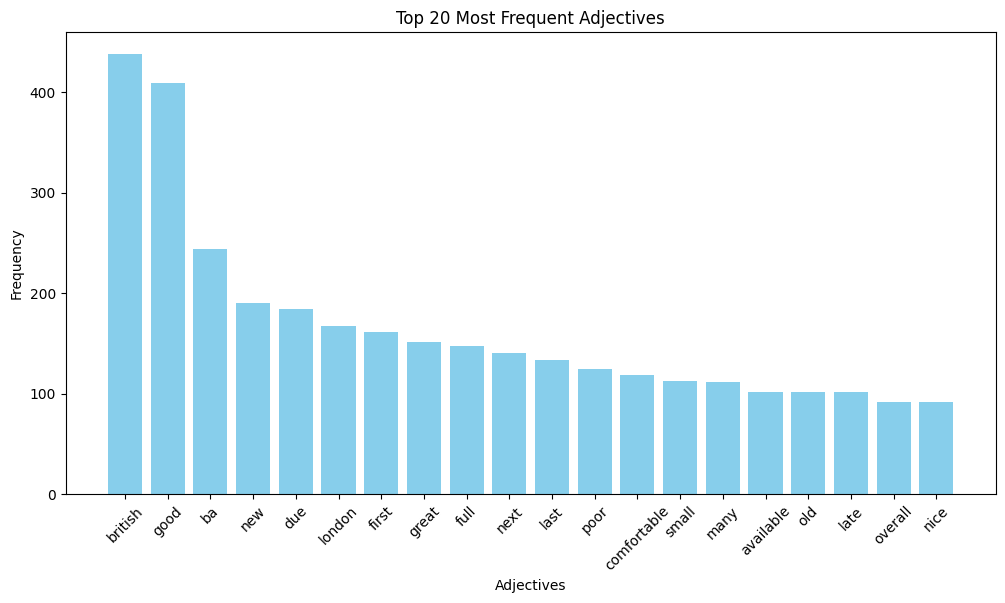

In [49]:
import nltk
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Join all reviews into a single string
all_reviews = ' '.join(df['reviews'].dropna())

# Tokenize manually using nltk
tokens = word_tokenize(all_reviews.lower())

# Remove stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

# Perform POS tagging
tagged_tokens = pos_tag(filtered_tokens)

# Filter for adjectives (JJ, JJR, JJS are tags for adjectives)
adjectives = [word for word, tag in tagged_tokens if tag in ('JJ', 'JJR', 'JJS')]

# Count adjective frequencies
adj_freq = Counter(adjectives)

# Prepare data for plotting
if adj_freq:  # Check if there are any adjectives
    words, counts = zip(*adj_freq.most_common(20))

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Adjectives')
    plt.ylabel('Frequency')
    plt.title('Top 20 Most Frequent Adjectives')
    plt.xticks(rotation=45)
    plt.show()
    plt.savefig('data/top_20_adjectives.png', bbox_inches='tight')  # You can choose the file format (e.g., .png, .pdf)
    plt.close()  # Close the plot to free memory
else:
    print("No adjectives found in the reviews.")

In [50]:
!pip install nltk pandas matplotlib

In [57]:
# Define a list of cities and adjectives
cities = ['london', 'new york', 'paris', 'tokio', 'warsaw']
adjectives = ['bad', 'delayed', 'slow','worst', 'pure', 'late', 'small']
def find_adjective_city_pairs(review, cities, adjectives):
    found_pairs = []
    review_lower = review.lower()
    # Check if any city and any adjective are present in the same review
    for city in cities:
        for adjective in adjectives:
            if adjective in review_lower and city in review_lower:
                found_pairs.append(f"{adjective} {city}")
    return found_pairs

# Initialize a list to collect found phrases
all_found_pairs = []

In [59]:
# Iterate through each review and find matching phrases
for review in df['reviews']:
    pairs = find_adjective_city_pairs(review, cities, adjectives)
    all_found_pairs.extend(pairs)

# Count occurrences of each phrase
phrase_freq = Counter(all_found_pairs)

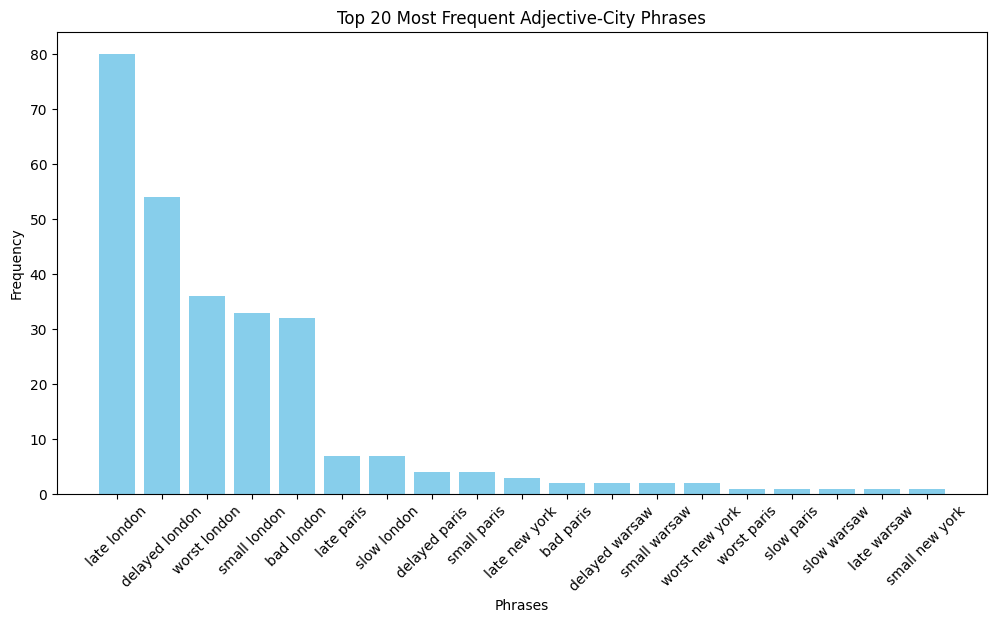

In [60]:
# Prepare data for plotting
if phrase_freq:  # Check if there are any phrases
    phrases, counts = zip(*phrase_freq.most_common(20))

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(phrases, counts, color='skyblue')
    plt.xlabel('Phrases')
    plt.ylabel('Frequency')
    plt.title('Top 20 Most Frequent Adjective-City Phrases')
    plt.xticks(rotation=45)
    plt.show()
    
    # Save plot to a file
    plt.savefig('top_20_adjective_city_phrases.png', bbox_inches='tight')
    plt.close()  # Close the plot to free memory
else:
    print("No matching phrases found.")